In [98]:
%matplotlib inline

import os 
import sys 
import time
import hashlib

from datetime  import datetime 

import numpy as np 
import pandas as pd

from scipy import stats
from scipy.stats import itemfreq
from scipy import linalg
import scipy.cluster.hierarchy as sch
import fastcluster as fc 

from sklearn.decomposition import PCA
from sklearn.decomposition import ProjectedGradientNMF

from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn import svm
from sklearn import preprocessing
from sklearn.neighbors import KDTree
import statsmodels.api as sm 


import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

import seaborn as sns 
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize": (14, 6)})

import IPython
from IPython.display import display

import preprocess as prep
import dataformat as dtf

In [3]:
data_fin ='../data/preprocessed/udpjitter-H1april2014_exp.csv'

In [4]:
data = pd.read_csv(data_fin)

In [5]:
list(data.columns)

['unit_id',
 'dtime',
 'day',
 'hour',
 'minute',
 'target',
 'packet_size',
 'stream_rate',
 'duration',
 'packets_up_sent',
 'packets_down_sent',
 'packets_up_recv',
 'packets_down_recv',
 'jitter_up',
 'jitter_down',
 'latency',
 'successes',
 'failures',
 'location_id',
 'ranNode',
 'apNode',
 'hubType',
 'headlineSpeed']

In [7]:
np.shape(data)

(3315067, 23)

In [9]:
data['target'].head()

0      81.147.49.140
1    173.234.235.106
2      81.147.49.140
3      81.147.49.140
4      81.147.49.141
Name: target, dtype: object

In [11]:
len(np.unique(data['target']))

10

In [12]:
len(np.unique(data['unit_id']))

2662

In [13]:
len(np.unique(data['apNode']))

371369

In [14]:
len(np.unique(data['ranNode']))

307187

In [15]:
len(np.unique(data['hubType']))

373646

In [16]:
data['hubType'].head(n=10)

0     9
1     5
2     9
3     9
4    11
5    10
6   NaN
7     8
8     9
9     9
Name: hubType, dtype: float64

In [17]:
data['ranNode'].head(n=10)

0     1
1     1
2     5
3     5
4     6
5     1
6   NaN
7     6
8     6
9     5
Name: ranNode, dtype: float64

In [18]:
np.unique(data['hubType'])[:20]

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

In [19]:
data.fillna(-1, inplace=True)

In [21]:
np.unique(data['hubType'])

array([ -1.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.])

In [23]:
np.unique(data['apNode'])

array([ -1.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])

In [24]:
data.drop('location_id', 1, inplace=True)

In [26]:
np.shape(data)

(3315067, 22)

In [27]:
list(data.columns)

['unit_id',
 'dtime',
 'day',
 'hour',
 'minute',
 'target',
 'packet_size',
 'stream_rate',
 'duration',
 'packets_up_sent',
 'packets_down_sent',
 'packets_up_recv',
 'packets_down_recv',
 'jitter_up',
 'jitter_down',
 'latency',
 'successes',
 'failures',
 'ranNode',
 'apNode',
 'hubType',
 'headlineSpeed']

In [28]:
data_f = data[data.failures==True]

In [29]:
np.shape(data_f)

(59957, 22)

In [36]:
data_f['failures'].head()

2      1
88     1
237    1
261    1
273    1
Name: failures, dtype: int64

In [38]:
data_t = data[data.failures==False]

In [39]:
data_f = data[data.failures==True]

In [41]:
np.shape(data_f)

(59957, 22)

In [51]:
sns.corrplot(data_f.corr())

In [56]:
sns.corrplot(data_f.corr())

In [57]:
data_f.corr()

,unit_id,dtime,day,hour,minute,packet_size,stream_rate,duration,packets_up_sent,packets_down_sent,...,packets_down_recv,jitter_up,jitter_down,latency,successes,failures,ranNode,apNode,hubType,headlineSpeed
unit_id,1.000000,0.035364,0.034230,0.017934,0.007335,NaN,0.144224,-0.016643,-0.014467,-0.015209,...,-0.013995,-0.004923,-0.001813,-0.009579,NaN,NaN,0.158371,-0.005957,0.076556,-0.030588
dtime,0.035364,1.000000,0.997720,0.075410,-0.002186,NaN,0.049387,0.015633,0.015567,-0.005521,...,0.015814,0.027190,-0.004922,0.000870,NaN,NaN,0.065424,0.037634,0.042283,0.011216
day,0.034230,0.997720,1.000000,0.008006,-0.004185,NaN,0.044621,0.014065,0.014017,-0.005543,...,0.014290,0.025058,-0.005392,0.000004,NaN,NaN,0.063402,0.036593,0.041421,0.012930
hour,0.017934,0.075410,0.008006,1.000000,-0.012374,NaN,0.070819,0.026364,0.026046,0.001036,...,0.025662,0.035173,0.007018,0.012852,NaN,NaN,0.032811,0.014717,0.010440,-0.023396
minute,0.007335,-0.002186,-0.004185,-0.012374,1.000000,NaN,0.040345,-0.060668,-0.059326,-0.022283,...,-0.059465,-0.060228,-0.006587,-0.000247,NaN,NaN,-0.004698,0.053688,0.097029,-0.035064
packet_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stream_rate,0.144224,0.049387,0.044621,0.070819,0.040345,NaN,1.000000,0.061342,0.061370,0.042652,...,0.061329,0.042735,0.019436,0.010742,NaN,NaN,0.250596,-0.023392,0.063278,-0.139110
duration,-0.016643,0.015633,0.014065,0.026364,-0.060668,NaN,0.061342,1.000000,0.999548,0.685788,...,0.998840,0.704915,0.311930,0.176464,NaN,NaN,-0.292247,-0.031960,-0.114012,0.159077
packets_up_sent,-0.014467,0.015567,0.014017,0.026046,-0.059326,NaN,0.061370,0.999548,1.000000,0.694993,...,0.999334,0.696356,0.316694,0.175028,NaN,NaN,-0.291870,-0.031527,-0.113094,0.156752
packets_down_sent,-0.015209,-0.005521,-0.005543,0.001036,-0.022283,NaN,0.042652,0.685788,0.694993,1.000000,...,0.696496,-0.032073,0.363234,0.027749,NaN,NaN,-0.226012,-0.061098,-0.081168,0.019279


{'boxes': [<matplotlib.lines.Line2D at 0x7f0441d852d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0441da2690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0441de3110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0441dfee10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0441d85c50>,
  <matplotlib.lines.Line2D at 0x7f0441da2190>]}

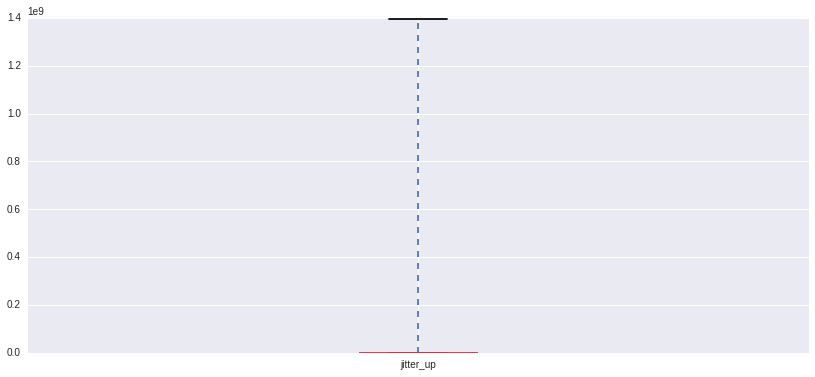

In [106]:
data_f[['jitter_up']].boxplot()
#plt.figure()
#data_f[['jitter_up']].boxplot(sym='', whis=[35,65])


In [58]:
data_t.corr()

,unit_id,dtime,day,hour,minute,packet_size,stream_rate,duration,packets_up_sent,packets_down_sent,...,packets_down_recv,jitter_up,jitter_down,latency,successes,failures,ranNode,apNode,hubType,headlineSpeed
unit_id,1.000000,0.018903,0.019038,-0.002356,0.023081,NaN,NaN,-0.066243,-0.067374,-0.067374,...,-0.052581,-0.009079,-0.010130,0.011034,NaN,NaN,0.124740,0.039544,0.064569,0.016902
dtime,0.018903,1.000000,0.997775,0.067088,0.006512,NaN,NaN,-0.010053,-0.019252,-0.019252,...,-0.010731,0.003088,0.000698,0.000796,NaN,NaN,0.000188,0.000943,0.001514,-0.000582
day,0.019038,0.997775,1.000000,0.000475,0.003726,NaN,NaN,-0.010062,-0.019204,-0.019204,...,-0.010390,0.002353,-0.000960,0.000209,NaN,NaN,0.000422,0.001108,0.001781,-0.000340
hour,-0.002356,0.067088,0.000475,1.000000,0.000101,NaN,NaN,-0.000073,-0.001343,-0.001343,...,-0.005509,0.011021,0.024913,0.009074,NaN,NaN,-0.003059,-0.002250,-0.003403,-0.003224
minute,0.023081,0.006512,0.003726,0.000101,1.000000,NaN,NaN,-0.003189,-0.000648,-0.000648,...,0.000864,0.002370,-0.001283,-0.006277,NaN,NaN,-0.010295,-0.004740,-0.013225,-0.010212
packet_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stream_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,-0.066243,-0.010053,-0.010062,-0.000073,-0.003189,NaN,NaN,1.000000,0.713923,0.713923,...,0.633232,-0.007313,-0.007531,0.007036,NaN,NaN,0.027892,0.025739,0.038626,0.042802
packets_up_sent,-0.067374,-0.019252,-0.019204,-0.001343,-0.000648,NaN,NaN,0.713923,1.000000,1.000000,...,0.886682,0.001281,0.002108,0.014108,NaN,NaN,0.044022,0.040450,0.062914,0.064483
packets_down_sent,-0.067374,-0.019252,-0.019204,-0.001343,-0.000648,NaN,NaN,0.713923,1.000000,1.000000,...,0.886682,0.001281,0.002108,0.014108,NaN,NaN,0.044022,0.040450,0.062914,0.064483


In [69]:
data_f.drop('stream_rate', 1, inplace=True)

In [70]:
data_f.drop('successes', 1, inplace=True)

In [71]:
data_f.drop('failures', 1, inplace=True)

ValueError: labels ['failures'] not contained in axis

In [72]:
list(data_f.columns)

['unit_id',
 'dtime',
 'day',
 'hour',
 'minute',
 'target',
 'packet_size',
 'duration',
 'packets_up_sent',
 'packets_down_sent',
 'packets_up_recv',
 'packets_down_recv',
 'jitter_up',
 'jitter_down',
 'latency',
 'ranNode',
 'apNode',
 'hubType',
 'headlineSpeed']

In [73]:
np.shape(data_f)

(59957, 19)

In [75]:
data_t = data[data.failures==False]

In [76]:
data_t.drop('stream_rate', 1, inplace=True)

/root/.virtualenvs/scipy/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [78]:
data_t.drop('successes', 1, inplace=True)

/root/.virtualenvs/scipy/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [79]:
data_t.drop('failures', 1, inplace=True)

/root/.virtualenvs/scipy/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
data_f.corr()

,unit_id,dtime,day,hour,minute,packet_size,duration,packets_up_sent,packets_down_sent,packets_up_recv,packets_down_recv,jitter_up,jitter_down,latency,ranNode,apNode,hubType,headlineSpeed
unit_id,1.000000,0.035364,0.034230,0.017934,0.007335,NaN,-0.016643,-0.014467,-0.015209,-0.013398,-0.013995,-0.004923,-0.001813,-0.009579,0.158371,-0.005957,0.076556,-0.030588
dtime,0.035364,1.000000,0.997720,0.075410,-0.002186,NaN,0.015633,0.015567,-0.005521,0.015798,0.015814,0.027190,-0.004922,0.000870,0.065424,0.037634,0.042283,0.011216
day,0.034230,0.997720,1.000000,0.008006,-0.004185,NaN,0.014065,0.014017,-0.005543,0.014304,0.014290,0.025058,-0.005392,0.000004,0.063402,0.036593,0.041421,0.012930
hour,0.017934,0.075410,0.008006,1.000000,-0.012374,NaN,0.026364,0.026046,0.001036,0.025236,0.025662,0.035173,0.007018,0.012852,0.032811,0.014717,0.010440,-0.023396
minute,0.007335,-0.002186,-0.004185,-0.012374,1.000000,NaN,-0.060668,-0.059326,-0.022283,-0.059844,-0.059465,-0.060228,-0.006587,-0.000247,-0.004698,0.053688,0.097029,-0.035064
packet_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,-0.016643,0.015633,0.014065,0.026364,-0.060668,NaN,1.000000,0.999548,0.685788,0.996854,0.998840,0.704915,0.311930,0.176464,-0.292247,-0.031960,-0.114012,0.159077
packets_up_sent,-0.014467,0.015567,0.014017,0.026046,-0.059326,NaN,0.999548,1.000000,0.694993,0.997422,0.999334,0.696356,0.316694,0.175028,-0.291870,-0.031527,-0.113094,0.156752
packets_down_sent,-0.015209,-0.005521,-0.005543,0.001036,-0.022283,NaN,0.685788,0.694993,1.000000,0.698845,0.696496,-0.032073,0.363234,0.027749,-0.226012,-0.061098,-0.081168,0.019279
packets_up_recv,-0.013398,0.015798,0.014304,0.025236,-0.059844,NaN,0.996854,0.997422,0.698845,1.000000,0.997865,0.688928,0.304783,0.122909,-0.292999,-0.033890,-0.113067,0.157328


In [81]:
data_f.drop('packet_size', 1, inplace=True)

In [82]:
data_t.drop('packet_size', 1, inplace=True)

/root/.virtualenvs/scipy/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [83]:
data_f.corr()

,unit_id,dtime,day,hour,minute,duration,packets_up_sent,packets_down_sent,packets_up_recv,packets_down_recv,jitter_up,jitter_down,latency,ranNode,apNode,hubType,headlineSpeed
unit_id,1.000000,0.035364,0.034230,0.017934,0.007335,-0.016643,-0.014467,-0.015209,-0.013398,-0.013995,-0.004923,-0.001813,-0.009579,0.158371,-0.005957,0.076556,-0.030588
dtime,0.035364,1.000000,0.997720,0.075410,-0.002186,0.015633,0.015567,-0.005521,0.015798,0.015814,0.027190,-0.004922,0.000870,0.065424,0.037634,0.042283,0.011216
day,0.034230,0.997720,1.000000,0.008006,-0.004185,0.014065,0.014017,-0.005543,0.014304,0.014290,0.025058,-0.005392,0.000004,0.063402,0.036593,0.041421,0.012930
hour,0.017934,0.075410,0.008006,1.000000,-0.012374,0.026364,0.026046,0.001036,0.025236,0.025662,0.035173,0.007018,0.012852,0.032811,0.014717,0.010440,-0.023396
minute,0.007335,-0.002186,-0.004185,-0.012374,1.000000,-0.060668,-0.059326,-0.022283,-0.059844,-0.059465,-0.060228,-0.006587,-0.000247,-0.004698,0.053688,0.097029,-0.035064
duration,-0.016643,0.015633,0.014065,0.026364,-0.060668,1.000000,0.999548,0.685788,0.996854,0.998840,0.704915,0.311930,0.176464,-0.292247,-0.031960,-0.114012,0.159077
packets_up_sent,-0.014467,0.015567,0.014017,0.026046,-0.059326,0.999548,1.000000,0.694993,0.997422,0.999334,0.696356,0.316694,0.175028,-0.291870,-0.031527,-0.113094,0.156752
packets_down_sent,-0.015209,-0.005521,-0.005543,0.001036,-0.022283,0.685788,0.694993,1.000000,0.698845,0.696496,-0.032073,0.363234,0.027749,-0.226012,-0.061098,-0.081168,0.019279
packets_up_recv,-0.013398,0.015798,0.014304,0.025236,-0.059844,0.996854,0.997422,0.698845,1.000000,0.997865,0.688928,0.304783,0.122909,-0.292999,-0.033890,-0.113067,0.157328
packets_down_recv,-0.013995,0.015814,0.014290,0.025662,-0.059465,0.998840,0.999334,0.696496,0.997865,1.000000,0.693930,0.303173,0.165091,-0.292193,-0.032193,-0.113428,0.156753


In [84]:
data_t.corr()

,unit_id,dtime,day,hour,minute,duration,packets_up_sent,packets_down_sent,packets_up_recv,packets_down_recv,jitter_up,jitter_down,latency,ranNode,apNode,hubType,headlineSpeed
unit_id,1.000000,0.018903,0.019038,-0.002356,0.023081,-0.066243,-0.067374,-0.067374,-0.061349,-0.052581,-0.009079,-0.010130,0.011034,0.124740,0.039544,0.064569,0.016902
dtime,0.018903,1.000000,0.997775,0.067088,0.006512,-0.010053,-0.019252,-0.019252,-0.017562,-0.010731,0.003088,0.000698,0.000796,0.000188,0.000943,0.001514,-0.000582
day,0.019038,0.997775,1.000000,0.000475,0.003726,-0.010062,-0.019204,-0.019204,-0.017446,-0.010390,0.002353,-0.000960,0.000209,0.000422,0.001108,0.001781,-0.000340
hour,-0.002356,0.067088,0.000475,1.000000,0.000101,-0.000073,-0.001343,-0.001343,-0.002288,-0.005509,0.011021,0.024913,0.009074,-0.003059,-0.002250,-0.003403,-0.003224
minute,0.023081,0.006512,0.003726,0.000101,1.000000,-0.003189,-0.000648,-0.000648,-0.001069,0.000864,0.002370,-0.001283,-0.006277,-0.010295,-0.004740,-0.013225,-0.010212
duration,-0.066243,-0.010053,-0.010062,-0.000073,-0.003189,1.000000,0.713923,0.713923,0.608003,0.633232,-0.007313,-0.007531,0.007036,0.027892,0.025739,0.038626,0.042802
packets_up_sent,-0.067374,-0.019252,-0.019204,-0.001343,-0.000648,0.713923,1.000000,1.000000,0.851270,0.886682,0.001281,0.002108,0.014108,0.044022,0.040450,0.062914,0.064483
packets_down_sent,-0.067374,-0.019252,-0.019204,-0.001343,-0.000648,0.713923,1.000000,1.000000,0.851270,0.886682,0.001281,0.002108,0.014108,0.044022,0.040450,0.062914,0.064483
packets_up_recv,-0.061349,-0.017562,-0.017446,-0.002288,-0.001069,0.608003,0.851270,0.851270,1.000000,0.772560,-0.099741,-0.024943,-0.075170,0.038719,0.035779,0.053905,0.057286
packets_down_recv,-0.052581,-0.010731,-0.010390,-0.005509,0.000864,0.633232,0.886682,0.886682,0.772560,1.000000,-0.004242,-0.099005,-0.040747,0.054333,0.044596,0.064287,0.066347


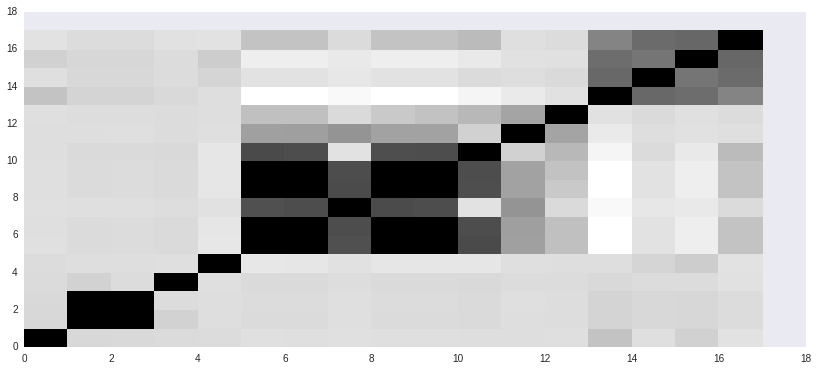

In [101]:
plt.pcolor(data_f.corr())

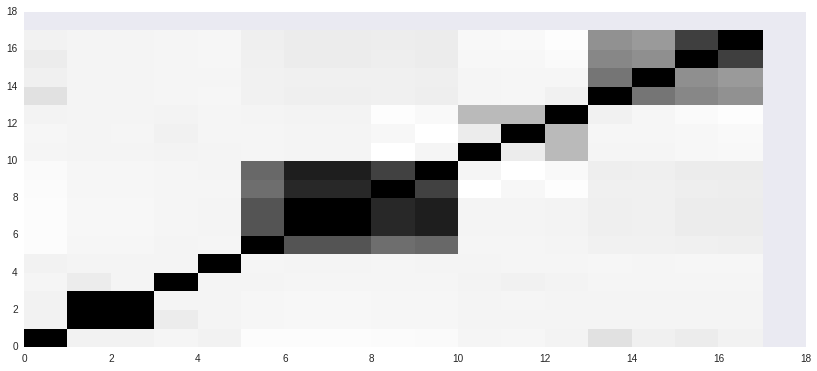

In [107]:
plt.pcolor(data_t.corr())

In [90]:
diff = data_f.corr() - data_t.corr()

In [93]:
type(diff)

pandas.core.frame.DataFrame

In [94]:
diff['duration']

unit_id              0.049601
dtime                0.025687
day                  0.024127
hour                 0.026438
minute              -0.057479
duration             0.000000
packets_up_sent      0.285625
packets_down_sent   -0.028135
packets_up_recv      0.388851
packets_down_recv    0.365609
jitter_up            0.712229
jitter_down          0.319461
latency              0.169428
ranNode             -0.320139
apNode              -0.057699
hubType             -0.152638
headlineSpeed        0.116275
Name: duration, dtype: float64

In [97]:
diff.apply(lambda x: max(x))

unit_id              0.052908
dtime                0.065236
day                  0.062980
hour                 0.035870
minute               0.110254
duration             0.712229
packets_up_sent      0.695076
packets_down_sent    0.361126
packets_up_recv      0.788670
packets_down_recv    0.698172
jitter_up            0.788670
jitter_down          0.402179
latency              0.205837
ranNode              0.065236
apNode               0.118943
hubType              0.110254
headlineSpeed        0.233226
dtype: float64

([<matplotlib.axis.XTick at 0x7f044078fc50>,
 <a list of 17 Text xticklabel objects>)

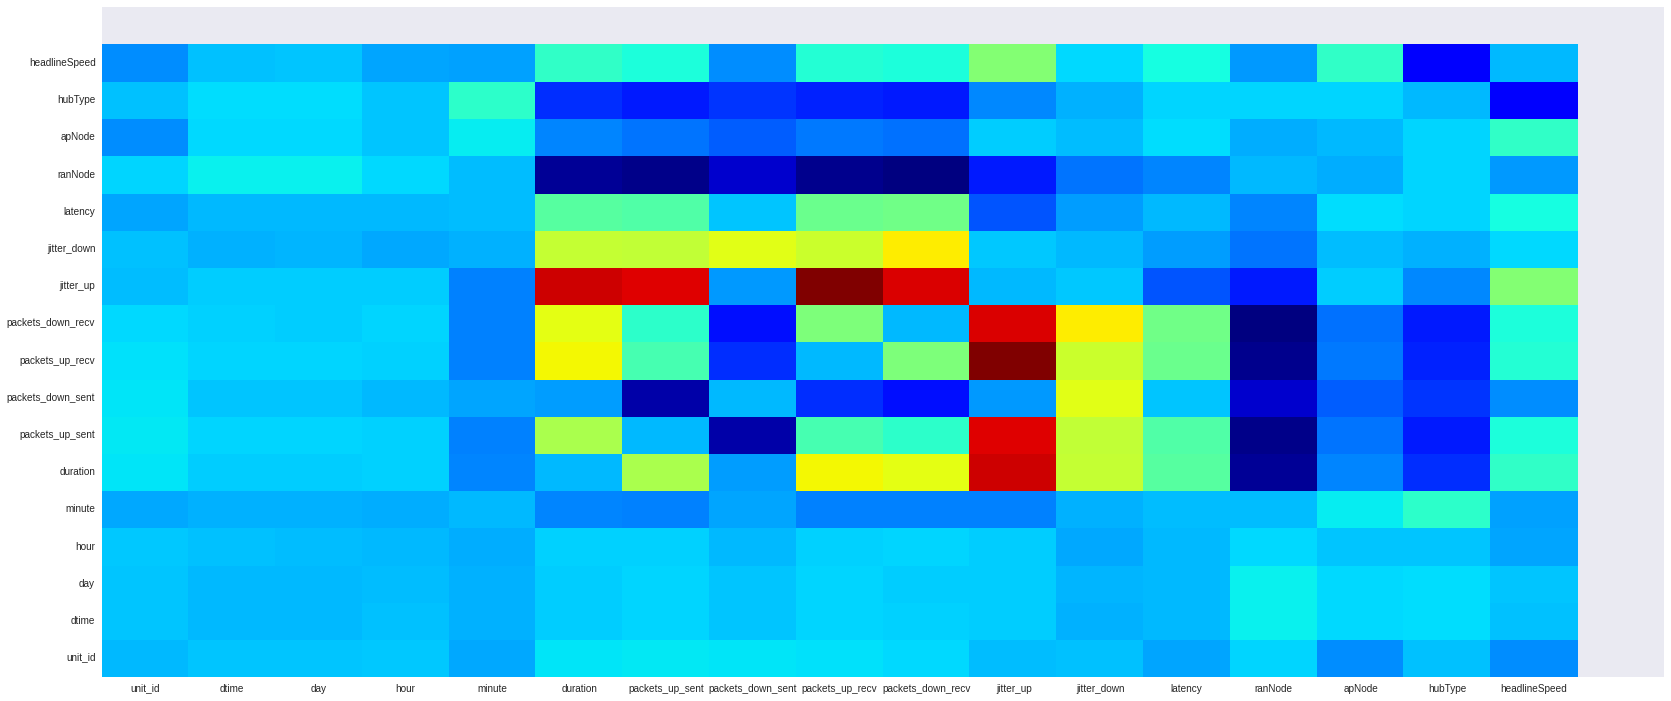

In [140]:
plt.figure(figsize=(28,12))
plt.pcolor(diff, cmap='jet')
plt.yticks(np.arange(0.5,17.5),list(diff.columns))
plt.xticks(np.arange(0.5,17.5),list(diff.columns))

In [123]:
len(list(diff.columns))

17

In [129]:
diff

,unit_id,dtime,day,hour,minute,duration,packets_up_sent,packets_down_sent,packets_up_recv,packets_down_recv,jitter_up,jitter_down,latency,ranNode,apNode,hubType,headlineSpeed
unit_id,0.000000,0.016461,0.015191,0.020291,-0.015746,0.049601,0.052908,0.052166,0.047951,0.038586,0.004156,0.008318,-0.020613,0.033631,-0.045502,0.011987,-0.047491
dtime,0.016461,0.000000,-0.000055,0.008323,-0.008698,0.025687,0.034820,0.013732,0.033360,0.026545,0.024102,-0.005621,0.000074,0.065236,0.036691,0.040769,0.011798
day,0.015191,-0.000055,0.000000,0.007531,-0.007911,0.024127,0.033221,0.013661,0.031750,0.024680,0.022705,-0.004432,-0.000206,0.062980,0.035484,0.039640,0.013269
hour,0.020291,0.008323,0.007531,0.000000,-0.012475,0.026438,0.027389,0.002379,0.027524,0.031171,0.024152,-0.017895,0.003778,0.035870,0.016967,0.013842,-0.020172
minute,-0.015746,-0.008698,-0.007911,-0.012475,0.000000,-0.057479,-0.058678,-0.021635,-0.058775,-0.060329,-0.062598,-0.005304,0.006031,0.005597,0.058428,0.110254,-0.024853
duration,0.049601,0.025687,0.024127,0.026438,-0.057479,0.000000,0.285625,-0.028135,0.388851,0.365609,0.712229,0.319461,0.169428,-0.320139,-0.057699,-0.152638,0.116275
packets_up_sent,0.052908,0.034820,0.033221,0.027389,-0.058678,0.285625,0.000000,-0.305007,0.146152,0.112652,0.695076,0.314586,0.160921,-0.335892,-0.071976,-0.176007,0.092269
packets_down_sent,0.052166,0.013732,0.013661,0.002379,-0.021635,-0.028135,-0.305007,0.000000,-0.152425,-0.190186,-0.033354,0.361126,0.013641,-0.270034,-0.101547,-0.144082,-0.045205
packets_up_recv,0.047951,0.033360,0.031750,0.027524,-0.058775,0.388851,0.146152,-0.152425,0.000000,0.225305,0.788670,0.329726,0.198079,-0.331718,-0.069669,-0.166972,0.100042
packets_down_recv,0.038586,0.026545,0.024680,0.031171,-0.060329,0.365609,0.112652,-0.190186,0.225305,0.000000,0.698172,0.402179,0.205837,-0.346526,-0.076789,-0.177715,0.090407


In [141]:
data['hubType'].head()

0     9
1     5
2     9
3     9
4    11
Name: hubType, dtype: float64

In [143]:
np.unique(data['hubType'])

array([ -1.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.])

In [148]:
np.shape(data_f[data_f['hubType'] == -1])

(4955, 18)

In [149]:
np.shape(data_f)

(59957, 18)

In [151]:
np.shape(data_t[data_t['hubType'] == -1])

(368679, 18)

In [152]:
np.shape(data_t)

(3255110, 18)